In [1]:
#poc
%cd ca-pytroch

/home/wierzbin/Int-CD45-scRNAseq/Code/ca-pytroch


Principal coordinates of row variables in DataFrame:
              Dim 0     Dim 1     Dim 2
Laundry   -0.991837  0.495322 -0.316729
Main_meal -0.875585  0.490109 -0.164065
Dinner    -0.692574  0.308104 -0.207414
Breakfast -0.508600  0.452804  0.220405
Tidying   -0.393808 -0.434344 -0.094214
Dishes    -0.188964 -0.441966  0.266949
Shopping  -0.117681 -0.403317  0.202615
Official   0.226632  0.253613  0.923364
Driving    0.741770  0.653414  0.544458
Finances   0.270767 -0.617868  0.034797
Insurance  0.647076 -0.473783 -0.289361
Repairs    1.528779  0.864265 -0.472088
Holidays   0.252486 -1.435007 -0.129587
                Dim 0     Dim 1     Dim 2
Wife        -0.837622  0.365221 -0.199911
Alternating -0.062185  0.291594  0.848589
Husband      1.160918  0.601920 -0.188859
Jointly      0.149426 -1.026579 -0.046443


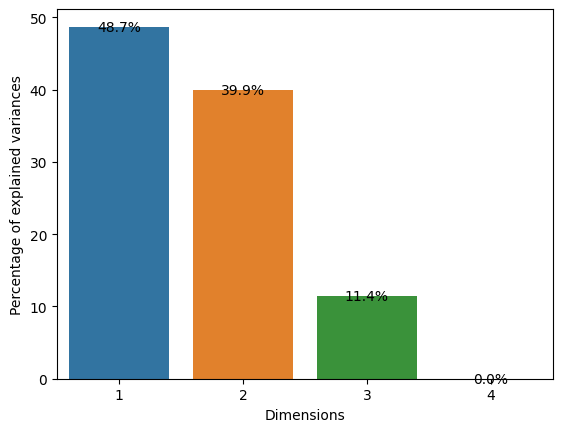

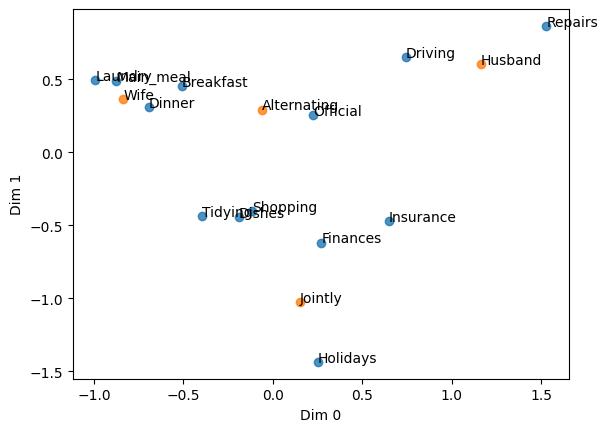

In [18]:
"""
Test 2 of correspondence analysis
Correspondence Analysis in R: The Ultimate Guide for the Analysis,
the Visualization and the Interpretation - R software and data mining
http://www.sthda.com/english/wiki/correspondence-analysis-in-r-the-ultimate-guide-for-the-analysis-the-visualization-and-the-interpretation-r-software-and-data-mining#ca-scatter-plot-biplot-of-row-and-column-variables
The data is a contingency table containing 13 housetasks and their repartition
in the couple
"""

import ca
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


transfer = ca.CA()

house_tasks = pd.read_csv('https://raw.githubusercontent.com/marcin119a/ca-pytroch/main/datasets/house_tasks.csv', index_col=0)

transfer.fit(house_tasks)

pcs_row, pcs_col = \
    transfer.get_princpl_coords_df(row_categories=house_tasks.index,
                                   col_categories=house_tasks.columns)
pcs_row['Dim 1'] = -pcs_row['Dim 1']
pcs_col['Dim 1'] = -pcs_col['Dim 1']
print('Principal coordinates of row variables in DataFrame:')
print(pcs_row)
print(pcs_col)

variances = transfer.principal_inertias_
percent_explnd_var = (variances / variances.sum()) * 100

fig, ax = plt.subplots()
sns.barplot(x=np.arange(1, 5), y=percent_explnd_var[:4], ax=ax)
ax.set_xlabel('Dimensions')
ax.set_ylabel('Percentage of explained variances')
var_text = ['{:.1f}%'.format(pers) for pers in percent_explnd_var[:4]]
for i, txt in enumerate(var_text):
    ax.annotate(txt, (i, percent_explnd_var[i]),
                horizontalalignment='center',
                verticalalignment='center')
plt.show()

fig, ax = plt.subplots()
sns.regplot(x='Dim 0', y='Dim 1', data=pcs_row, fit_reg=False, ax=ax)
sns.regplot(x='Dim 0', y='Dim 1', data=pcs_col, fit_reg=False, ax=ax)
for i, txt in enumerate(list(house_tasks.index)):
    ax.annotate(txt, (pcs_row.iloc[i]['Dim 0'], pcs_row.iloc[i]['Dim 1']))
for i, txt in enumerate(list(house_tasks.columns)):
    ax.annotate(txt, (pcs_col.iloc[i]['Dim 0'], pcs_col.iloc[i]['Dim 1']))
ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
plt.show()

In [19]:
result = pcs_row

In [20]:
result

,Dim 0,Dim 1,Dim 2
Laundry,-0.991837,0.495322,-0.316729
Main_meal,-0.875585,0.490109,-0.164065
Dinner,-0.692574,0.308104,-0.207414
Breakfast,-0.508600,0.452804,0.220405
Tidying,-0.393808,-0.434344,-0.094214
Dishes,-0.188964,-0.441966,0.266949
Shopping,-0.117681,-0.403317,0.202615
Official,0.226632,0.253613,0.923364
Driving,0.741770,0.653414,0.544458
Finances,0.270767,-0.617868,0.034797


Principal coordinates of row variables in DataFrame:
              Dim 0     Dim 1     Dim 2         Dim 3
Laundry   -1.027061 -0.338202  0.352080  1.485038e-16
Main_meal -0.864019 -0.365938  0.094649  2.312126e-16
Dinner    -0.691033 -0.189178  0.238450 -1.898727e-16
Breakfast -0.605207 -0.371323 -0.144300  2.503130e-17
Tidying   -0.306076  0.480439  0.085771  2.136197e-17
Dishes    -0.126630  0.371642 -0.233433  8.431674e-17
Shopping   0.015007  0.461866 -0.179131  3.592087e-17
Official   0.119879 -0.440943 -1.011462  1.089944e-16
Driving    0.633813 -0.752182 -0.562223  7.449971e-17
Finances   0.411997  0.658137 -0.020990  4.148284e-17
Insurance  0.744965  0.404481  0.251661  1.180997e-16
Repairs    1.375234 -1.023983  0.536915  7.909613e-17
Holidays   0.431789  1.388817  0.062456  1.319849e-16
                Dim 0     Dim 1     Dim 2         Dim 3
Wife        -0.858046 -0.241174  0.208093 -1.201411e-16
Alternating -0.063499 -0.390664 -0.875951 -1.201411e-16
Husband      1.066023 -

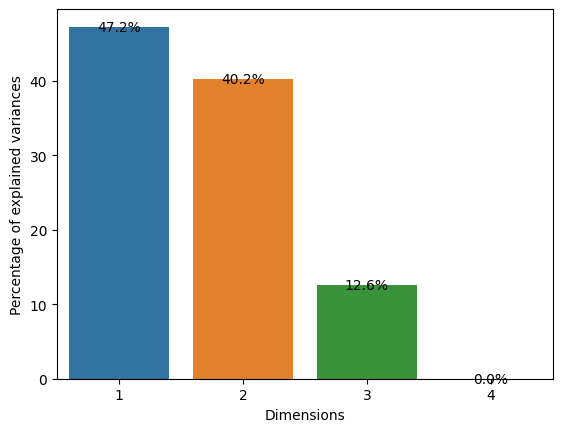

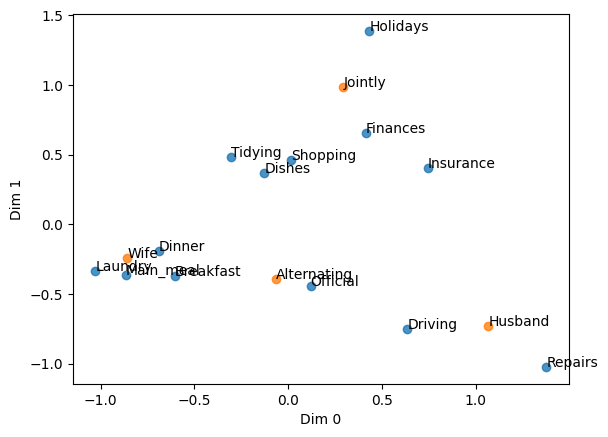

In [21]:
"""
Test 2 of correspondence analysis
Correspondence Analysis in R: The Ultimate Guide for the Analysis,
the Visualization and the Interpretation - R software and data mining
http://www.sthda.com/english/wiki/correspondence-analysis-in-r-the-ultimate-guide-for-the-analysis-the-visualization-and-the-interpretation-r-software-and-data-mining#ca-scatter-plot-biplot-of-row-and-column-variables
The data is a contingency table containing 13 housetasks and their repartition
in the couple
"""

import ca
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


transfer = ca.CA()

house_tasks2 = pd.read_csv('https://raw.githubusercontent.com/marcin119a/ca-pytroch/main/datasets/house_tasks3.csv', index_col=0)

transfer.fit(house_tasks2)

pcs_row, pcs_col = \
    transfer.get_princpl_coords_df(row_categories=house_tasks2.index,
                                   col_categories=house_tasks2.columns)
pcs_row['Dim 1'] = -pcs_row['Dim 1']
pcs_col['Dim 1'] = -pcs_col['Dim 1']
print('Principal coordinates of row variables in DataFrame:')
print(pcs_row)
print(pcs_col)

result['Dim 4'] = pcs_row['Dim 0']
result['Dim 5'] = -pcs_row['Dim 1']
result['Dim 6'] = pcs_row['Dim 2']

variances = transfer.principal_inertias_
percent_explnd_var = (variances / variances.sum()) * 100

fig, ax = plt.subplots()
sns.barplot(x=np.arange(1, 5), y=percent_explnd_var[:4], ax=ax)
ax.set_xlabel('Dimensions')
ax.set_ylabel('Percentage of explained variances')
var_text = ['{:.1f}%'.format(pers) for pers in percent_explnd_var[:4]]
for i, txt in enumerate(var_text):
    ax.annotate(txt, (i, percent_explnd_var[i]),
                horizontalalignment='center',
                verticalalignment='center')
plt.show()

fig, ax = plt.subplots()
sns.regplot(x='Dim 0', y='Dim 1', data=pcs_row, fit_reg=False, ax=ax)
sns.regplot(x='Dim 0', y='Dim 1', data=pcs_col, fit_reg=False, ax=ax)
for i, txt in enumerate(list(house_tasks2.index)):
    ax.annotate(txt, (pcs_row.iloc[i]['Dim 0'], pcs_row.iloc[i]['Dim 1']))
for i, txt in enumerate(list(house_tasks2.columns)):
    ax.annotate(txt, (pcs_col.iloc[i]['Dim 0'], pcs_col.iloc[i]['Dim 1']))
ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
plt.show()

In [22]:
result

,Dim 0,Dim 1,Dim 2,Dim 4,Dim 5,Dim 6
Laundry,-0.991837,0.495322,-0.316729,-1.027061,0.338202,0.352080
Main_meal,-0.875585,0.490109,-0.164065,-0.864019,0.365938,0.094649
Dinner,-0.692574,0.308104,-0.207414,-0.691033,0.189178,0.238450
Breakfast,-0.508600,0.452804,0.220405,-0.605207,0.371323,-0.144300
Tidying,-0.393808,-0.434344,-0.094214,-0.306076,-0.480439,0.085771
Dishes,-0.188964,-0.441966,0.266949,-0.126630,-0.371642,-0.233433
Shopping,-0.117681,-0.403317,0.202615,0.015007,-0.461866,-0.179131
Official,0.226632,0.253613,0.923364,0.119879,0.440943,-1.011462
Driving,0.741770,0.653414,0.544458,0.633813,0.752182,-0.562223
Finances,0.270767,-0.617868,0.034797,0.411997,-0.658137,-0.020990


In [23]:
house_tasks.shape

(13, 4)

In [24]:
house_tasks

,Wife,Alternating,Husband,Jointly
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3
Finances,13,13,21,66


In [25]:
X_mc = result[result.columns[0:3]]
Y_mc = result[result.columns[3:]]

In [26]:
Y_mc

,Dim 4,Dim 5,Dim 6
Laundry,-1.027061,0.338202,0.352080
Main_meal,-0.864019,0.365938,0.094649
Dinner,-0.691033,0.189178,0.238450
Breakfast,-0.605207,0.371323,-0.144300
Tidying,-0.306076,-0.480439,0.085771
Dishes,-0.126630,-0.371642,-0.233433
Shopping,0.015007,-0.461866,-0.179131
Official,0.119879,0.440943,-1.011462
Driving,0.633813,0.752182,-0.562223
Finances,0.411997,-0.658137,-0.020990


In [27]:
X_mc

,Dim 0,Dim 1,Dim 2
Laundry,-0.991837,0.495322,-0.316729
Main_meal,-0.875585,0.490109,-0.164065
Dinner,-0.692574,0.308104,-0.207414
Breakfast,-0.508600,0.452804,0.220405
Tidying,-0.393808,-0.434344,-0.094214
Dishes,-0.188964,-0.441966,0.266949
Shopping,-0.117681,-0.403317,0.202615
Official,0.226632,0.253613,0.923364
Driving,0.741770,0.653414,0.544458
Finances,0.270767,-0.617868,0.034797


In [28]:
Y_mc

,Dim 4,Dim 5,Dim 6
Laundry,-1.027061,0.338202,0.352080
Main_meal,-0.864019,0.365938,0.094649
Dinner,-0.691033,0.189178,0.238450
Breakfast,-0.605207,0.371323,-0.144300
Tidying,-0.306076,-0.480439,0.085771
Dishes,-0.126630,-0.371642,-0.233433
Shopping,0.015007,-0.461866,-0.179131
Official,0.119879,0.440943,-1.011462
Driving,0.633813,0.752182,-0.562223
Finances,0.411997,-0.658137,-0.020990


In [29]:


	
from sklearn.cross_decomposition import CCA

ca = CCA(n_components = 2)

ca.fit(X_mc, Y_mc)
X_c, Y_c = ca.transform(X_mc, Y_mc)



In [30]:
cc_res = pd.DataFrame({"CCX_1":X_c[:, 0],
                       "CCY_1":Y_c[:, 0],
                       "CCX_2":X_c[:, 1],
                       "CCY_2":Y_c[:, 1],
                       "activities":list(result.index)})

In [31]:


import numpy as np
np.corrcoef(X_c[:, 0], Y_c[:, 0])



array([[1.        , 0.99933922],
       [0.99933922, 1.        ]])

In [32]:
np.corrcoef(X_c[:, 1], Y_c[:, 1])



array([[1.        , 0.99751573],
       [0.99751573, 1.        ]])

Text(0.5, 1.0, 'Comp. 1, corr = 1.00')

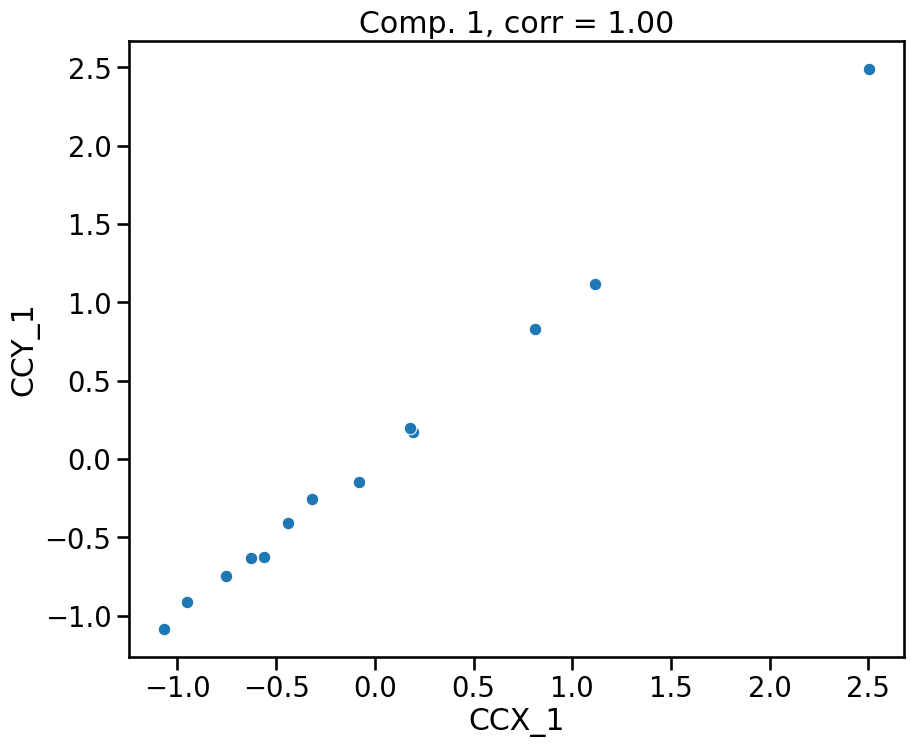

In [33]:
sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_1",
                y="CCY_1", 
                data=cc_res)
plt.title('Comp. 1, corr = %.2f' %
         np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

Text(0.5, 1.0, 'Comp. 1, corr = 1.00')

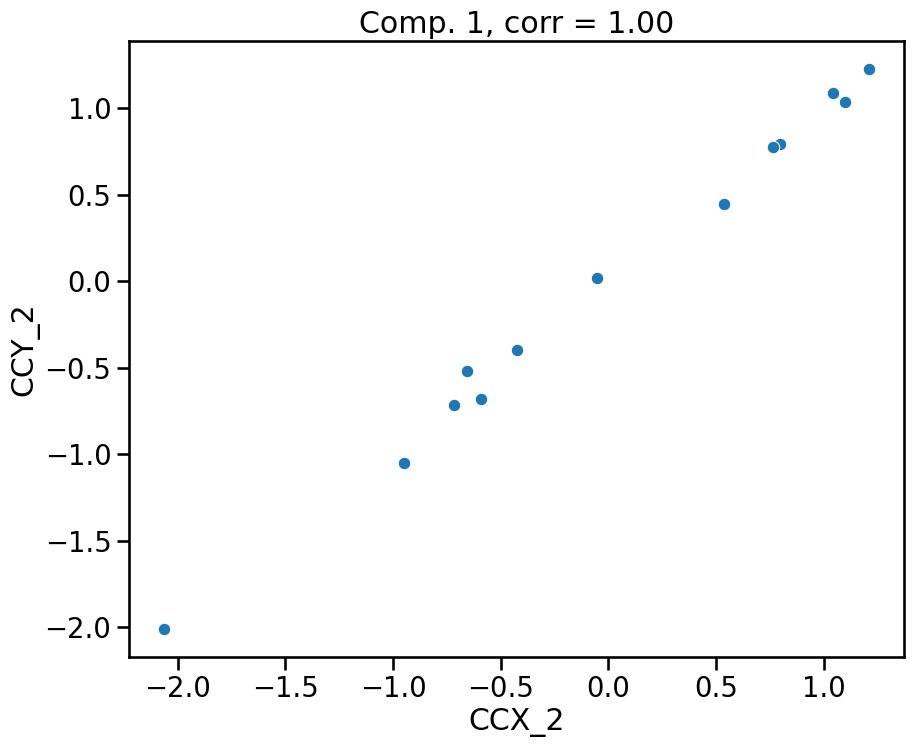

In [34]:


sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_2",
                y="CCY_2", 
                data=cc_res)
plt.title('Comp. 1, corr = %.2f' %
         np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1])



In [ ]:
cc_res

In [ ]:
fig, ax = plt.subplots()

plt.figure(figsize=(10,8))
sns.regplot(x='CCX_1', y='CCY_1', data=cc_res, fit_reg=False, ax=ax)
for i, txt in enumerate(list(cc_res['activities'])):
    ax.annotate(txt, (cc_res.iloc[i]['CCX_1'], cc_res.iloc[i]['CCY_1']))
ax.set_xlabel('CCX_1')
ax.set_ylabel('CCY_1')
plt.show()